In [1]:
from matplotlib import pyplot
from keras.utils import to_categorical
import tensorflow as tf

Using TensorFlow backend.
C:\Users\meakh\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meakh\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meakh\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meakh\AppData\Roa

In [31]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential,callbacks
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Dense

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print("Train Shape :", X_train.shape, y_train.shape)
print("Test Shape :", X_test.shape, y_test.shape)

Train Shape : (50000, 32, 32, 3) (50000, 1)
Test Shape : (10000, 32, 32, 3) (10000, 1)


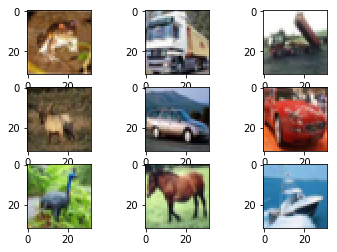

In [5]:
for i in range(9):
    pyplot.subplot(3,3,i+1)
    pyplot.imshow(X_train[i])
pyplot.show()

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
model = Sequential()

In [32]:
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10,activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)        

In [33]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [24]:
import math
def scheduler(epoch,lr):
        return lr*math.exp(-0.1)
lr = callbacks.LearningRateScheduler(scheduler)

In [34]:
bar = callbacks.ProgbarLogger(count_mode = 'samples')

In [26]:
tb = callbacks.TensorBoard(log_dir='logs', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=32,
                         write_images=True)

W0906 16:25:36.722322  5712 callbacks.py:1467] `write_grads` will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.
W0906 16:25:36.724326  5712 callbacks.py:1470] `batch_size` is no longer needed in the `TensorBoard` Callback and will be ignored in TensorFlow 2.0.


In [38]:
filepath="weights.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', mode = 'max')

In [41]:
early_stop = callbacks.EarlyStopping(monitor = 'accuracy', verbose = 1, patience = 1)

In [42]:
plat = callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', verbose = 1)

In [43]:
with tf.device('/gpu:0'):
    model.fit(X_train, y_train, batch_size = 256, epochs = 16, verbose = 1, validation_data = (X_test, y_test), callbacks = [bar,checkpoint, early_stop, plat])

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
Epoch 1/16
50000/50000 [==============================] - 43s 868us/sample - loss: 1.3221 - accuracy: 0.5239 - val_loss: 2.7094 - val_accuracy: 0.2532
Epoch 2/16
Epoch 2/16
50000/50000 [==============================] - 37s 750us/sample - loss: 0.9697 - accuracy: 0.6644 - val_loss: 0.9505 - val_accuracy: 0.6831
Epoch 3/16
Epoch 3/16
50000/50000 [==============================] - 37s 750us/sample - loss: 0.7927 - accuracy: 0.7314 - val_loss: 0.9142 - val_accuracy: 0.7044
Epoch 4/16
Epoch 4/16
50000/50000 [==============================] - 37s 750us/sample - loss: 0.6571 - accuracy: 0.7806 - val_loss: 1.0686 - val_accuracy: 0.6871
Epoch 5/16
Epoch 5/16
50000/50000 [==============================] - 38s 754us/sample - loss: 0.5411 - accuracy: 0.8252 - val_loss: 0.7885 - val_accuracy: 0.7564
Epoch 6/16
Epoch 6/16
50000/50000 [==============================] - 38s 751us/sample - loss: 0.4523 - accuracy: 0.8538 - val_loss: 0.7683 -

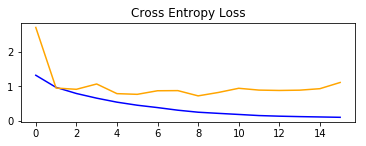

In [55]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(model.history.history['loss'], color='blue', label='train')
pyplot.plot(model.history.history['val_loss'], color='orange', label='test')

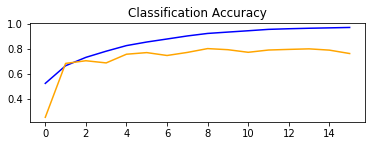

In [56]:
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(model.history.history['accuracy'], color='blue', label='train')
pyplot.plot(model.history.history['val_accuracy'], color='orange', label='test')

In [57]:
model.save_weights('cifar_weights')

In [60]:
model.save('.\cifar\cifar_cnn') 